In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data 
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")


# Q1) Who will win the match KXIP vs KKR?

In [3]:
# get all matches between KXIP vs kkr
kkr_kxip = matches[((matches.team1=='Kolkata Knight Riders')&(matches.team2=='Kings XI Punjab'))|((matches.team2=='Kolkata Knight Riders')&(matches.team1=='Kings XI Punjab'))]

print(f"Total number of matches between KXIP vs kkr : {kkr_kxip.shape[0]}")

Total number of matches between KXIP vs kkr : 25


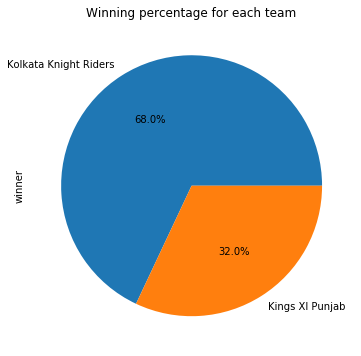

In [4]:
# calculating total wins by each team
kkr_kxip.winner.value_counts().plot("pie", autopct = "%1.1f%%", figsize=(20,6))
plt.title("Winning percentage for each team")
plt.show()

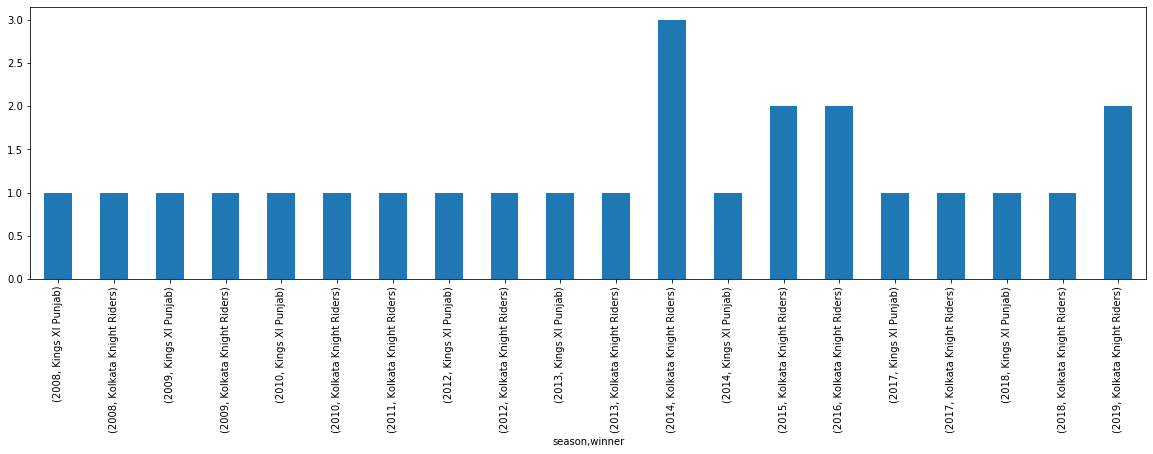

In [5]:
#checking winning percent per season
df_kkr_kxip = pd.DataFrame(kkr_kxip.groupby('season')['winner'].value_counts())
df_kkr_kxip['winner'].plot(kind='bar', figsize=(20,5))

**Inference:**
    When we count overall matches between KKR and KXIP data indicates that KKR is having more wins hence higher winning probability of 68%.

# Q2) How many dot balls will bowled in entire match
    - Less than 60
    - 60 -90
    - 91 - 120
    - 120 or more

In [11]:
#get all rows kkr and kxip play together
kkr_kxip = deliveries[((deliveries.bowling_team=='Kolkata Knight Riders')&(deliveries.batting_team=='Kings XI Punjab'))|((deliveries.batting_team=='Kolkata Knight Riders')&(deliveries.bowling_team=='Kings XI Punjab'))]

kkr_kxip_tot_balls = kkr_kxip.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
kkr_kxip_tot_balls = kkr_kxip_tot_balls.rename(columns={'total_runs': 'total_balls'})

kkr_kxip_dots = kkr_kxip[(kkr_kxip.total_runs==0)|(kkr_kxip.player_dismissed==np.nan)]
kkr_kxip_tot_dots = kkr_kxip_dots.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
kkr_kxip_tot_dots = kkr_kxip_tot_dots.rename(columns={'total_runs': 'total_dots'})

kkr_kxip_balls_dots_all = kkr_kxip_tot_balls.merge(kkr_kxip_tot_dots, how='left', on=['match_id', 'bowler'])
kkr_kxip_balls_dots_all['dots_total_ratio'] = np.round(kkr_kxip_balls_dots_all['total_dots']/kkr_kxip_balls_dots_all['total_balls']*100, 2)


In [15]:
dot_all = kkr_kxip_balls_dots_all.groupby('match_id')['total_dots'].sum().reset_index()
dot_all['total_dots'].describe()

count     25.000000
mean      80.040000
std       11.749043
min       54.000000
25%       75.000000
50%       80.000000
75%       88.000000
max      100.000000
Name: total_dots, dtype: float64

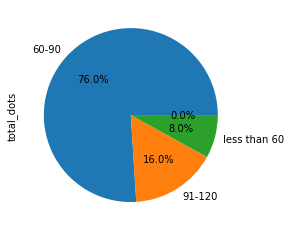

In [21]:
#checking option wise
pd.cut(dot_all.total_dots , bins = [0,60,91,120, 150], labels=['less than 60', '60-90', '91-120', '120 or more']).value_counts().plot("pie", autopct='%1.1f%%')

**Inference:**
    - We can see a very high probability indicating 60-90 dot balls in the match. with a probability of 76% however quite lesser than that is of 91-120 dot bals with probability of 16%.

# Q3) What many wickets will fall from 90th ball to 120th ball of both the innings?
    - 0-3
    - 4-6
    - 7-9
    - 10 or more

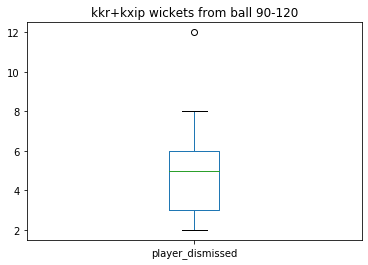

In [35]:
#getting all matches kxip vs kkr
kkr_kxip = deliveries[((deliveries.bowling_team=='Kolkata Knight Riders')&(deliveries.batting_team=='Kings XI Punjab'))|((deliveries.batting_team=='Kolkata Knight Riders')&(deliveries.bowling_team=='Kings XI Punjab'))]

#getting only wickets
kkr_kxip_wickets = kkr_kxip[kkr_kxip.player_dismissed.notnull()]

#getting only rows from 90th ball-120th ball i.e (15th over - 20th over)
kkr_kxip_wickets_ball90120 = kkr_kxip_wickets[kkr_kxip_wickets.over.isin(range(15,21))]

#counting match_wise total wickets from 90th - 120th ball
wickets_ball90120 = kkr_kxip_wickets_ball90120.groupby(['match_id'])['player_dismissed'].count()

wickets_ball90120.plot(kind="box", title="kkr+kxip wickets from ball 90-120")

count    43.000000
mean      2.953488
std       1.526800
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       6.000000
Name: player_dismissed, dtype: float64


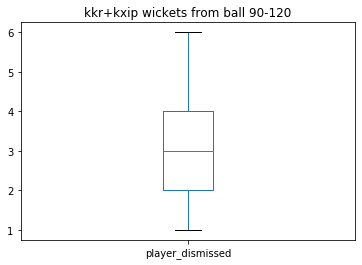

In [37]:
#match wickets
wickets_ball90120_team = kkr_kxip_wickets_ball90120.groupby(['match_id', 'bowling_team'])['player_dismissed'].count()
print(wickets_ball90120_team.describe())
wickets_ball90120_team.plot(kind="box", title="kkr+kxip wickets from ball 90-120")

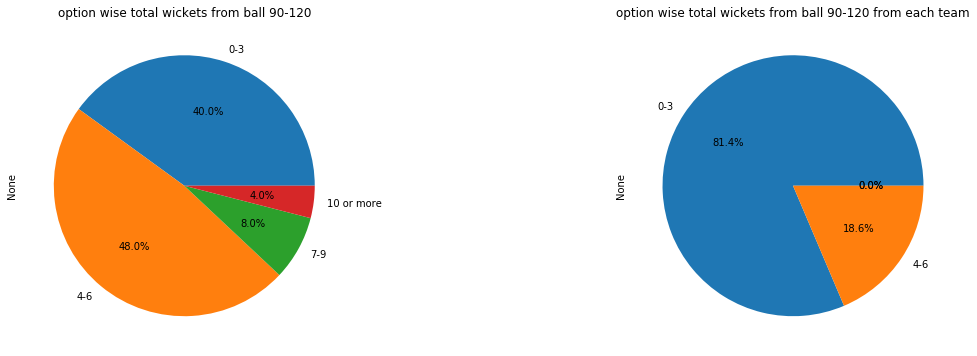

In [47]:
#checking as per options
fig,ax=plt.subplots(1,2,figsize=(20,6))
pd.cut(wickets_ball90120.values, bins=[0,4,7,10, 20], labels=['0-3', '4-6', '7-9', '10 or more']).value_counts().plot(kind="pie",autopct='%1.1f%%', title="option wise total wickets from ball 90-120", ax=ax[0])
pd.cut(wickets_ball90120_team.values, bins=[0,4,7,10, 20], labels=['0-3', '4-6', '7-9', '10 or more']).value_counts().plot(kind="pie",autopct='%1.1f%%', title="option wise total wickets from ball 90-120 from each team", ax=ax[1])


**Inference:**
    - From the graphs above we can see that highest probability is for 4-6 wickets for both teams included. But if we see probabilities of each team we have much higher probability of 0-3 wicets.

# Q4) How many balls would SRH take to reach 50 runs on team total

In [50]:
# get all rows when SRH batting KXIP bowling
srhb_kxipf = deliveries[(deliveries.batting_team == 'Sunrisers Hyderabad')&(deliveries.bowling_team == 'Kings XI Punjab')]

# srhb_kxipf_runs_cs = srhb_kxipf.groupby('match_id')['batsman_runs'].apply(lambda x: x.agg(['count', 'sum']))

# srhb_kxipf_runs_cs

srhb_kxipf['total_runs_cumsum'] = srhb_kxipf.groupby('match_id')['total_runs'].cumsum().values

df = srhb_kxipf[['match_id', 'total_runs_cumsum', 'ball']]
df.groupby('match_id')['total_runs_cumsum', 'ball'].agg(['count', sum])

balls_taken = []

#counting balls taken to score 50 runs by SRH team
for m in df['match_id'].unique():
    df1 = df[df.match_id==m]
    
    if df1.total_runs_cumsum.isin(range(50,55)).any():
        df2 = df1[df1.total_runs_cumsum<=50]
        balls_taken.append(df2.shape[0])

print(balls_taken)

[59, 30, 38, 43, 37, 45, 30, 41, 40, 32, 43, 44, 54, 46, 48, 36, 31, 26, 26, 35, 41, 46, 56, 21]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
pd.DataFrame(balls_taken).describe()

,0
count,24.000000
mean,39.500000
std,9.681897
min,21.000000
25%,31.750000
50%,40.500000
75%,45.250000
max,59.000000


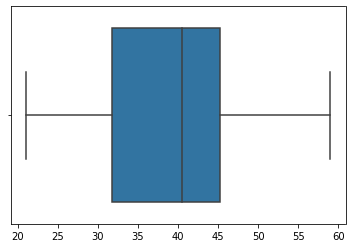

In [52]:
sns.boxplot(balls_taken)

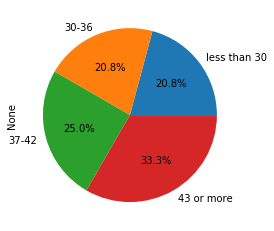

In [55]:
pd.cut(balls_taken, bins = [0,30,37,43,100], labels = ['less than 30', '30-36', '37-42', '43 or more']).value_counts().plot("pie", autopct='%1.1f%%')

**Inference:**
    - Data suggests highest probability is team might take 43 0r more runs to score 50 but on average it takes around 37-42 balls . As per the historic data if we see how many balls it took for SRH to score 50 runs in total on average around 39 balls so its safe to say they might take 37-42 balls to score 50 runs.

In [61]:
pd.DataFrame(runs_first10).describe()

,0
count,17.000000
mean,9.058824
std,8.806749
min,0.000000
25%,4.000000
50%,6.000000
75%,10.000000
max,34.000000


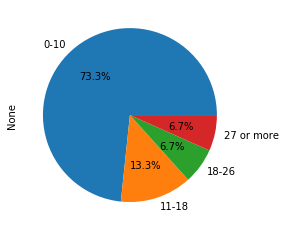

In [63]:
pd.cut(runs_first10, bins=[0,11,18,27,100], labels=['0-10', '11-18', '18-26', '27 or more']).value_counts().plot("pie", autopct='%1.1f%%')

**Inference:**
    - We can see that in most of matches he was caught out sooner however in first 10 balls on average he scored around 9 runs which is still less than 10. 

# Q5) How many runs will Chris Gayle score in the first 10 balls he faces? If he gets out before playing 10 balls, then the number of runs he scored will be considered.
    - 0-10
    - 11-18
    - 18 - 26
    - 27 or more

In [60]:
# get all matches when CH Gayle  bats against srh
cgb_srhf = deliveries[(deliveries.batsman == 'CH Gayle')&(deliveries.bowling_team=='Sunrisers Hyderabad')]

runs_first10=[]
for m in cgb_srhf.match_id.unique():
      #getting first 10 balls if got out before balls until out
    df = (cgb_srhf[cgb_srhf.match_id == m][:10])
    
    #get only rows when scored off boundaries
    runs_first10.append(df[df.batsman_runs.isin([4,6])]['batsman_runs'].sum())


In [61]:
pd.DataFrame(runs_first10).describe()

,0
count,17.000000
mean,9.058824
std,8.806749
min,0.000000
25%,4.000000
50%,6.000000
75%,10.000000
max,34.000000


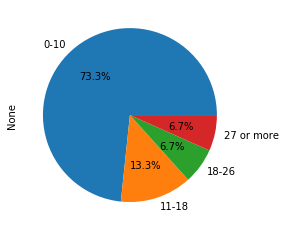

In [63]:
pd.cut(runs_first10, bins=[0,11,18,27,100], labels=['0-10', '11-18', '18-26', '27 or more']).value_counts().plot("pie", autopct='%1.1f%%')

**Inference:**
    - We can see that in most of matches he was caught out sooner however in first 10 balls on average he scored around 9 runs which is still less than 10. 

# Q4) What will be Glen Maxwell's contribution to the team total?

In [64]:
deliveries[deliveries.batsman=='GJ Maxwell']

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
910,4,2,Kings XI Punjab,Rising Pune Supergiant,12,2,GJ Maxwell,DA Miller,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
912,4,2,Kings XI Punjab,Rising Pune Supergiant,12,4,GJ Maxwell,DA Miller,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
915,4,2,Kings XI Punjab,Rising Pune Supergiant,13,1,GJ Maxwell,DA Miller,RD Chahar,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
916,4,2,Kings XI Punjab,Rising Pune Supergiant,13,2,GJ Maxwell,DA Miller,RD Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
918,4,2,Kings XI Punjab,Rising Pune Supergiant,13,4,GJ Maxwell,DA Miller,RD Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
919,4,2,Kings XI Punjab,Rising Pune Supergiant,13,5,GJ Maxwell,DA Miller,RD Chahar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
920,4,2,Kings XI Punjab,Rising Pune Supergiant,13,6,GJ Maxwell,DA Miller,RD Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
923,4,2,Kings XI Punjab,Rising Pune Supergiant,14,2,GJ Maxwell,DA Miller,R Bhatia,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
924,4,2,Kings XI Punjab,Rising Pune Supergiant,14,3,GJ Maxwell,DA Miller,R Bhatia,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
929,4,2,Kings XI Punjab,Rising Pune Supergiant,15,1,GJ Maxwell,DA Miller,BA Stokes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [67]:
# getting all matches for kxip vs kkr
kxipb_kkrf = deliveries[(deliveries.batting_team=='Kings XI Punjab')&(deliveries.bowling_team=='Kolkata Knight Riders')]

# getting total score of kxip team match wise vs kkr
kxipb_kkrf_tot = kxipb_kkrf.groupby('match_id')['total_runs'].sum().reset_index()

#getting all rows when Shreya Iyer was batting against kkr 
gmb_kkrf = kxipb_kkrf[kxipb_kkrf.batsman == 'GJ Maxwell']

#total runs scored by GJ Maxwell when agains kkr match wise
gmb_kkrf_tot = gmb_kkrf.groupby('match_id')['batsman_runs'].sum().reset_index()
gmb_kkrf_tot = gmb_kkrf_tot.rename(columns={'batsman_runs':'gm_total_runs'}) # changing column name to avoid confugmon

#joining the two data frames will be eagmer for comparison
kxipb_kkr_gm_tot = kxipb_kkrf_tot.merge(gmb_kkrf_tot, how='left', on='match_id')

#as its a left join we might get few null values introduced lets replace them with 0 for eagmer calculations
kxipb_kkr_gm_tot = kxipb_kkr_gm_tot.fillna(0)

#getting shreyas iyers contribution in total runs scored by team kxip against kkr
kxipb_kkr_gm_tot['gm_contribution'] = np.round(kxipb_kkr_gm_tot.gm_total_runs / kxipb_kkr_gm_tot.total_runs, 5)*100

print("Shreyas Iyer contribution in total runs scored by team kxip agains kkr")
kxipb_kkr_gm_tot

Shreyas Iyer contribution in total runs scored by team kxip agains kkr


,match_id,total_runs,gm_total_runs,gm_contribution
0,11,170,25.0,14.706
1,48,167,44.0,26.347
2,81,178,0.0,0.000
3,112,174,0.0,0.000
4,123,158,0.0,0.000
5,142,154,0.0,0.000
6,196,144,0.0,0.000
7,208,204,0.0,0.000
8,270,119,0.0,0.000
9,325,134,0.0,0.000


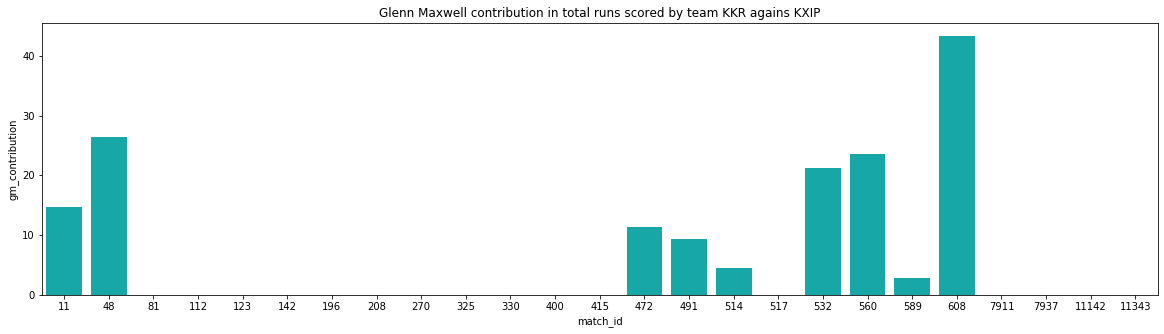

In [69]:
#checking visually
plt.figure(figsize=(20,5))
plt.title("Glenn Maxwell contribution in total runs scored by team KKR agains KXIP")
sns.barplot(x='match_id', y='gm_contribution', data=kxipb_kkr_gm_tot, color='c' )

plt.show()

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


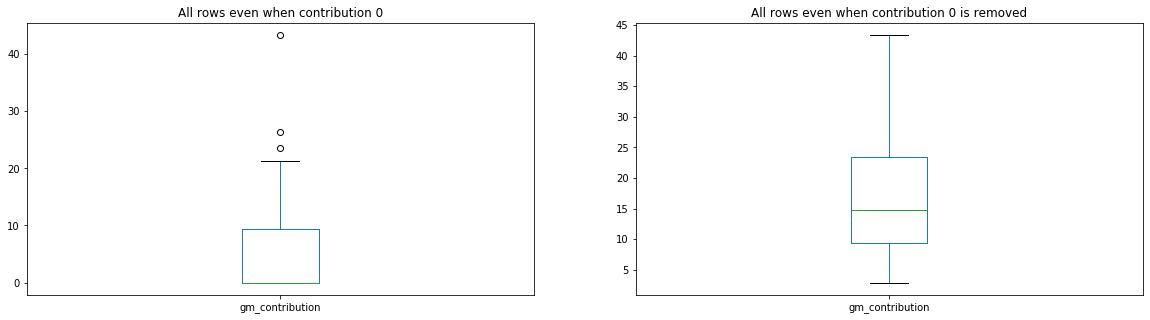

In [70]:
fig, ax=plt.subplots(1,2, figsize=(20,5))
#checking contribution stats
print(kxipb_kkr_gm_tot['gm_contribution'].plot('box', ax=ax[0])) # most of the matches has 0 runs so its understood why mean is lesser
ax[0].set_title("All rows even when contribution 0")

#if we remove rows when his contribution was 0
print(kxipb_kkr_gm_tot[kxipb_kkr_gm_tot.gm_contribution!=0]['gm_contribution'].plot('box', ax=ax[1]))
ax[1].set_title("All rows even when contribution 0 is removed")
plt.show()

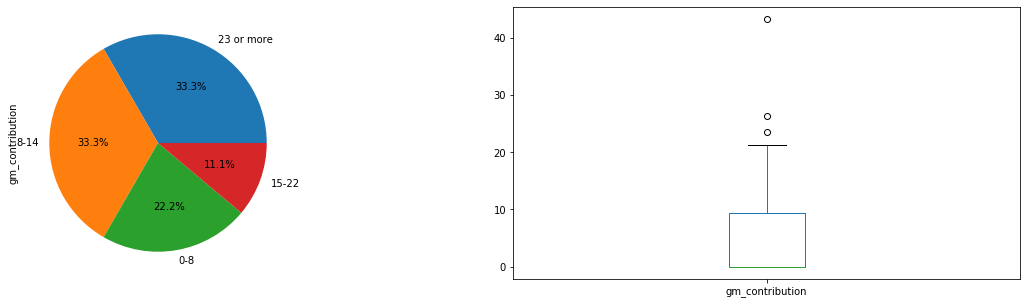

In [74]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
pd.cut(kxipb_kkr_gm_tot['gm_contribution'], bins=[0,8,15, 23, 100], labels=['0-8', '8-14', '15-22', '23 or more']).value_counts().plot('pie', autopct='%1.1f%%', ax=ax[0])

kxipb_kkr_gm_tot['gm_contribution'].plot("box", ax=ax[1])

**Inference:**
    Data suggests that 8-15% and 23-100% both have equal probabilty for the percentage of runs Maxwell will score w.r.t team, however 8-15 will be a safer option to go with.

# 5. How many no-balls will be bowled in the match?
    - 0-1
    - 2-3
    - 4-5
    - 6 or more

In [50]:
deliveries['noball_runs'].value_counts()

0    178364
1       698
2         9
5         6
3         1
Name: noball_runs, dtype: int64

In [51]:
noballs_bowls = deliveries[deliveries.noball_runs!=0]

#counting no ball runs during a match
noballs_bowls.groupby('match_id')['ball'].count().head()

match_id
1     2
7     3
10    1
11    2
12    1
Name: ball, dtype: int64

In [52]:
#checking wide bowls only when kkr is playing
noballs_kkr = noballs_bowls[(noballs_bowls.batting_team=='Kolkata Knight Riders')|(noballs_bowls.bowling_team=='Kolkata Knight Riders')]

noballs_kkr.groupby('match_id')['ball'].count().head()

match_id
7     3
11    2
23    1
27    2
53    1
Name: ball, dtype: int64

In [53]:
nb_kkr_count = noballs_kkr.groupby('match_id')['ball'].count().values

print(f'Average wide bowls by Kolkata Knight Riders in a match: {np.mean(nb_kkr_count)}')
print(f'Median  wide bowls by Kolkata Knight Riders in a match: {np.median(nb_kkr_count)}')
print(f'Minimum  wide bowls by Kolkata Knight Riders in a match: {np.min(nb_kkr_count)}')
print(f'Maximum  wide bowls by Kolkata Knight Riders in a match: {np.max(nb_kkr_count)}')

Average wide bowls by Kolkata Knight Riders in a match: 1.6129032258064515
Median  wide bowls by Kolkata Knight Riders in a match: 1.0
Minimum  wide bowls by Kolkata Knight Riders in a match: 1
Maximum  wide bowls by Kolkata Knight Riders in a match: 5


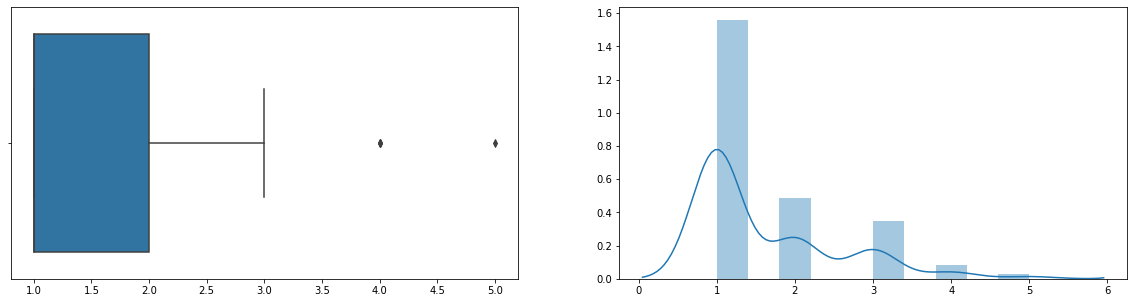

In [54]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(nb_kkr_count, ax = ax[0])
sns.distplot(nb_kkr_count, ax=ax[1])


In [62]:
#checking wide bowls only when DC is playing
noballs_kxip = noballs_bowls[(noballs_bowls.batting_team=='Kings XI Punjab')|(noballs_bowls.bowling_team=='Kings XI Punjab')]

noballs_kxip.groupby('match_id')['ball'].count().head()

match_id
11    2
15    3
19    1
22    2
32    1
Name: ball, dtype: int64

In [56]:
nb_kxip_count = noballs_kxip.groupby('match_id')['ball'].count().values

print(f'Average wide bowls by Kolkata Knight Riders in a match: {np.mean(nb_kxip_count)}')
print(f'Median  wide bowls by Kolkata Knight Riders in a match: {np.median(nb_kxip_count)}')
print(f'Minimum  wide bowls by Kolkata Knight Riders in a match: {np.min(nb_kxip_count)}')
print(f'Maximum  wide bowls by Kolkata Knight Riders in a match: {np.max(nb_kxip_count)}')

Average wide bowls by Kolkata Knight Riders in a match: 1.7666666666666666
Median  wide bowls by Kolkata Knight Riders in a match: 1.0
Minimum  wide bowls by Kolkata Knight Riders in a match: 1
Maximum  wide bowls by Kolkata Knight Riders in a match: 5


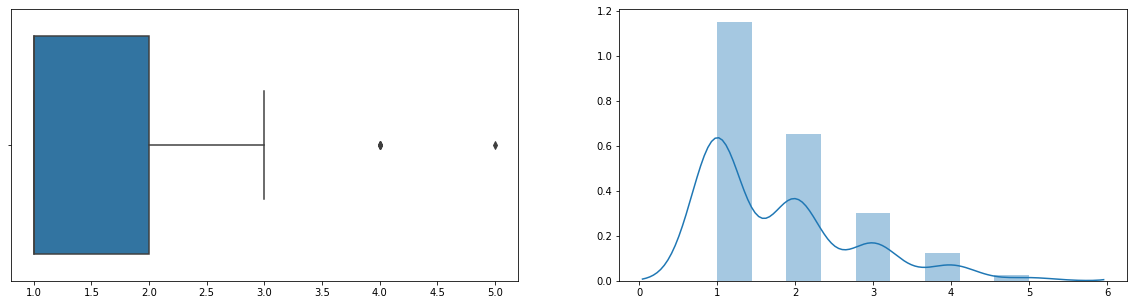

In [57]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(nb_kxip_count, ax = ax[0])
sns.distplot(nb_kxip_count, ax=ax[1])


In [58]:
#lets also check the matches played between kxip and kkr
nb_kkr_kxip = noballs_bowls[((noballs_bowls.batting_team=='Kings XI Punjab')&(noballs_bowls.bowling_team=='Kolkata Knight Riders'))|((noballs_bowls.batting_team=='Kolkata Knight Riders')&(noballs_bowls.bowling_team=='Kings XI Punjab'))]

nb_kkr_kxip.groupby('match_id')['ball'].count()

match_id
11       2
81       1
196      2
208      1
415      1
472      1
517      1
7911     1
11142    1
Name: ball, dtype: int64

In [59]:
nb_kkkxipr = nb_kkr_kxip.groupby('match_id')['ball'].count()

print(f'Average wide bowls in (kkr and kxip) match: {np.mean(nb_kkkxipr)}')
print(f'Median  wide bowls in (kkr and kxip) match: {np.median(nb_kkkxipr)}')
print(f'Minimum  wide bowls in (kkr and kxip) match: {np.min(nb_kkkxipr)}')
print(f'Maximum  wide bowls in (kkr and kxip) match: {np.max(nb_kkkxipr)}')

Average wide bowls in (kkr and kxip) match: 1.2222222222222223
Median  wide bowls in (kkr and kxip) match: 1.0
Minimum  wide bowls in (kkr and kxip) match: 1
Maximum  wide bowls in (kkr and kxip) match: 2


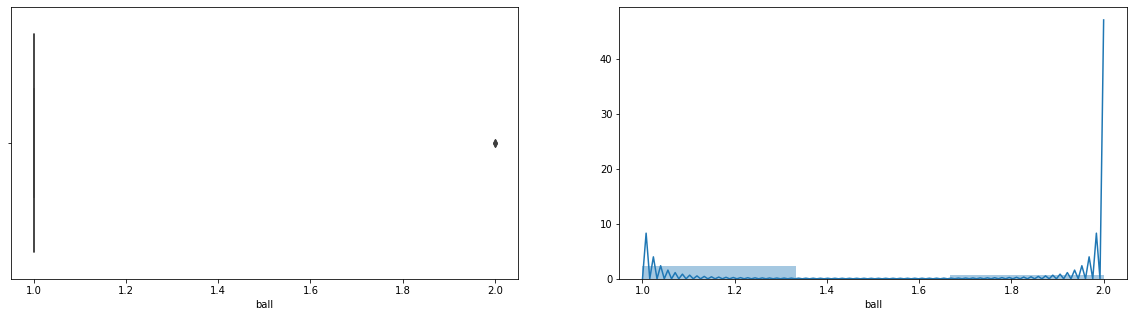

In [60]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(nb_kkkxipr, ax = ax[0])
sns.distplot(nb_kkkxipr, ax=ax[1])

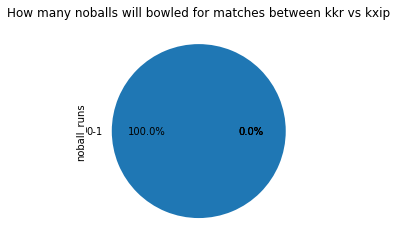

In [61]:
# get bins for getting probabilites as per per options 
kkr_kxip_noball = pd.cut(nb_kkr_kxip['noball_runs'], bins=[0,2,4,6,20], labels=['0-1', '2-3', '3-5', '6 or more'])
kkr_kxip_noball.value_counts().plot("pie", autopct='%1.1f%%')
plt.title("How many noballs will bowled for matches between kkr vs kxip")
plt.show()

**Inference:**
    Well we can see kxip vs kkr when playing with each other hardly have any noballs but in a very less number they dao which is only 1 noball.